In [107]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dublin_data_import.ipynb
import sys
sys.path.append('../')
from Functions import *
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [108]:
num_samples = 410
alpha = 2
alpha_prior = 2
dim = 10

In [109]:
def LR(x):
    return np.exp(-x/200)*0.01+0.0001

In [110]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_prior = np.zeros(len(random_numbers_matrix))
True_negativ_prior = np.zeros(len(random_numbers_matrix))
False_posetiv_prior = np.zeros(len(random_numbers_matrix))
False_negativ_prior = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

True_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))

Accuracy = np.zeros(len(random_numbers_matrix))
Accuracy_prior = np.zeros(len(random_numbers_matrix))
Accuracy_baseline = np.zeros(len(random_numbers_matrix))
Accuracy_stupid_baseline = np.zeros(len(random_numbers_matrix))


for s in range(len(random_numbers_matrix)):
    Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 200
    grad = 0
    points_copy = copy.deepcopy(points)
    points_copy_prior = copy.deepcopy(points)
    grad_sum = 0 # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy_prior,alpha_prior)
            grad_sum += np.sum((grad_now)**2)
            points_copy_prior[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum
        grad_sum = 0
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int),0]
    point_a = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value_prior = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior >= 0.5)
    False_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior <= -0.5)
    True_negativ_prior[s] = np.sum((connections*sigmoid_value_prior > -0.5) & (connections*sigmoid_value_prior < 0))
    False_negativ_prior[s] = np.sum((connections*sigmoid_value_prior >= 0) & (connections*sigmoid_value_prior < 0.5))

    prev_grad = 200
    grad = 0
    k = 0
    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum += np.sum((grad_now)**2)
            points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum
        grad_sum = 0
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int),0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value < 0))
    False_negativ[s] = np.sum((connections*sigmoid_value >= 0) & (connections*sigmoid_value < 0.5))

    Baseline = Baseline_function(Y,random_numbers_matrix[s].flatten().astype(int),Y_updated)
    True_posetiv_baseline[s] = np.sum(connections*Baseline >= 0.5)
    False_posetiv_baseline[s] = np.sum(connections*Baseline <= -0.5)
    True_negativ_baseline[s] = np.sum((connections*Baseline > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ_baseline[s] = np.sum((connections*Baseline > 0) & (connections*sigmoid_value < 0.5))

    True_posetiv_stupid_baseline[s] = np.sum(connections*2765/len(Y) >= 0.5)
    False_posetiv_stupid_baseline[s] = np.sum(connections*2765/len(Y) <= -0.5)
    True_negativ_stupid_baseline[s] = np.sum((connections*2765/len(Y) > -0.5) & (connections*2765/len(Y) <= 0))
    False_negativ_stupid_baseline[s] = np.sum((connections*2765/len(Y) > 0) & (connections*2765/len(Y) < 0.5))

    Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))
    Accuracy_prior[s] = (True_posetiv_prior[s]+True_negativ_prior[s])/(len(sigmoid_value))
    Accuracy_baseline[s] = (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(Baseline))
    Accuracy_stupid_baseline[s] = (True_posetiv_stupid_baseline[s]+True_negativ_stupid_baseline[s])/(len(Baseline))

200
-3457955.023443236
2653701.1260483735
556512.693040284
94857.61245720368
27018.596125295604
18809.286008340307
18087.41018510901
16490.628032086126
13945.151424138698
11349.254168176747
9043.330043581547
7092.421786243922
5518.422470040488
4299.112797966842
3375.016887387894
2677.891936684502
2149.5044496509345
1745.640995187352
1433.7744156807403
1189.9814912219335
996.7073932556423
841.3032259870724
714.8739049982878
611.1854606972947
525.7092082354675
454.9592562365833
396.13555817402903
346.9598482741144
305.58917450675153
270.54773233387914
240.6619560720328
215.00089433458834
192.82540573697725
173.5470238819521
156.69534103425713
141.89222529831295
128.8314690217851
117.26287602068987
106.98002595177627
97.81101941512111
89.61153045169249
82.25955822135484
75.65138670338865
69.69839780516418
64.3245042208996
59.46405565372993
55.06012492239097
51.06310793435796
47.4295843392033
44.12139226747479
41.1048757050022
38.350268603639506
35.83118591669813
33.52419783091068
31.40846

In [104]:
print('Accuracy', Accuracy)
print('Accuracy_prior', Accuracy_prior)
print('Accuracy_stupid_baseline', Accuracy_stupid_baseline)
print('Accuracy_stupid_baseline', Accuracy_stupid_baseline)

print('Recall', True_posetiv/(True_posetiv+False_posetiv))
print('Recall_prior', True_posetiv_prior/(True_posetiv_prior+False_posetiv_prior))
print('Recall baseline', True_posetiv_baseline/(True_posetiv_baseline+False_posetiv_baseline))
print('Recall simple baseline', True_posetiv_stupid_baseline/(1))

print('Precision', True_posetiv/(True_posetiv+False_negativ))
print('Precision_prior', True_posetiv_prior/(True_posetiv_prior+False_negativ_prior))
print('Precision baseline', True_posetiv_baseline/(True_posetiv_baseline+False_negativ_baseline))
print('Precision simple baseline', True_posetiv_stupid_baseline/(1))

Accuracy [0.97888836 0.97674141 0.98055821 0.97829198 0.97578721]
Accuracy_prior [0.97829198 0.97817271 0.98139313 0.97721851 0.97507156]
Accuracy_stupid_baseline [0.96815363 0.9682729  0.97101622 0.96767653 0.96564885]
Accuracy_stupid_baseline [0.96815363 0.9682729  0.97101622 0.96767653 0.96564885]
Recall [0.78846154 0.74482759 0.75974026 0.75141243 0.77419355]
Recall_prior [0.73480663 0.76433121 0.74857143 0.70408163 0.73652695]
Recall baseline [0.83333333 0.84210526 0.83928571 0.84090909 0.8487395 ]
Recall simple baseline [0. 0. 0. 0. 0.]
Precision [0.46067416 0.40601504 0.48148148 0.49077491 0.41666667]
Precision_prior [0.49812734 0.45112782 0.53909465 0.50922509 0.42708333]
Precision baseline [0.48165138 0.42105263 0.5        0.48684211 0.41908714]
Precision simple baseline [0. 0. 0. 0. 0.]


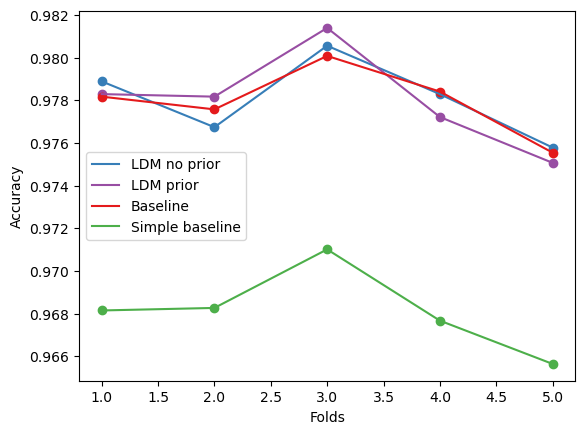

In [105]:
x = [1,2,3,4,5]
plt.plot(x,Accuracy,label='LDM no prior', color = '#377eb8')
plt.plot(x,Accuracy_prior, label='LDM prior', color = '#984ea3')
plt.plot(x,Accuracy_baseline, label='Baseline', color = '#e41a1c')
plt.plot(x,Accuracy_stupid_baseline, label='Simple baseline', color = '#4daf4a')
plt.scatter(x, Accuracy, facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(x, Accuracy_prior, facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(x, Accuracy_baseline, facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(x, Accuracy_stupid_baseline, facecolors='#4daf4a', edgecolors='#4daf4a')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.legend()
plt.show()

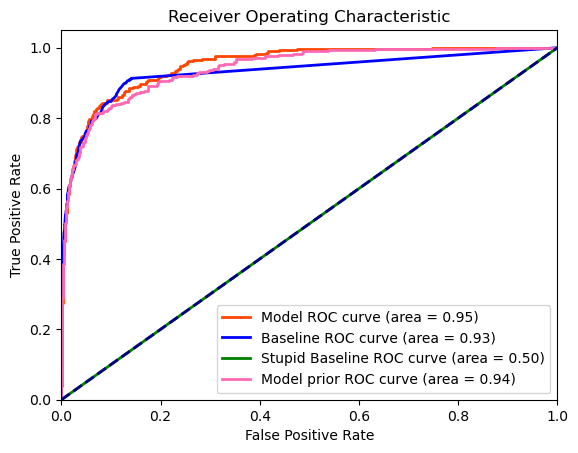

In [106]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = connections
y_true[y_true == -1] = 0
stupid_baseline = [2765/num_connectins] * len(sigmoid_value) 

# Compute ROC curve and AUC for sigmoid_value predictions
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for baseline predictions
fpr2, tpr2, _ = roc_curve(y_true, Baseline)
roc_auc2 = auc(fpr2, tpr2)

# Compute ROC curve and AUC for stupid baseline predictions
fpr3, tpr3, _ = roc_curve(y_true, stupid_baseline)
roc_auc3 = auc(fpr3, tpr3)

# Compute ROC curve and AUC for sigmoid_value predictions
fpr4, tpr4, _ = roc_curve(y_true, sigmoid_value_prior)
roc_auc4 = auc(fpr4, tpr4)

# Plot the ROC curve for all models
plt.figure()
plt.plot(fpr1, tpr1, color='orangered', lw=2, label='Model ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Baseline ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Stupid Baseline ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='hotpink', lw=2, label='Model prior ROC curve (area = %0.2f)' % roc_auc4)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()